In [14]:
import numpy as np
import pandas as pd
import duckdb

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

import datetime
import json

In [17]:
data = pd.read_csv("/Users/harrietkumah/cdj/billboard_sentiments_sp24/finalMatched.csv")
data.head()

,Year,Rank,track,artist,Lyrics,Compound Score,danceability,energy,key,loudness,...,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,2019,1,old town road,Lil Nas X,"Yeah, I'm gonna take my horse to the old town ...",0.8608,0.878,0.619,6.0,-5.560,...,0.1130,0.639,136.041,157.067,4.0,28.69559,6.0,1.0,10s,pop
1,2019,2,sunflower,Post Malone and Swae Lee,"Ayy, ayy, ayy, ayy (Ooh)\nOoh, ooh, ooh, ooh (...",-0.3313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,without me,Halsey,Found you when your heart was broke\nI filled ...,0.4671,0.752,0.488,6.0,-7.050,...,0.0936,0.533,136.041,201.661,4.0,43.53930,11.0,1.0,10s,pop
3,2019,4,bad guy,Billie Eilish,"White shirt now red, my bloody nose\nSleepin',...",-0.9964,0.701,0.425,7.0,-10.965,...,0.1000,0.562,135.128,194.088,4.0,61.59530,7.0,1.0,10s,rap
4,2019,5,wow,Post Malone,"Said she tired of little money, need a big boy...",0.8704,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.columns

Index(['Year', 'Rank', 'track', 'artist', 'Lyrics', 'Compound Score',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_s', 'time_signature', 'chorus_hit', 'sections', 'popularity',
       'decade', 'genre'],
      dtype='object')

In [4]:
data['genre'].unique()

array(['pop', nan, 'rap', 'latin', 'r&b', 'edm', 'rock'], dtype=object)

In [5]:
np.where(data['Year'] == 2019)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [7]:
# #calculate 5 year moving average
# #calculate danceability for each year

# decades_v_ = duckdb.sql("SELECT Year, genre, avg(danceability) \
# OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_average \
# FROM (SELECT Year, avg(danceability), genre FROM data WHERE decade != 'nan' and genre != 'nan' GROUP BY Year) a ").df()
# decades_v_dance

In [99]:
#calculate 5 year moving average
#calculate danceability for each year

average_features = duckdb.sql("SELECT Year, avg(danceability) as dance, \
avg(speechiness) as speech, \
avg(popularity) as pop, \
avg(loudness) as loud, \
avg(tempo) as tempo, \
avg(duration_s) as duration_s FROM data WHERE decade != 'nan' and genre != 'nan' GROUP BY Year").df()

moving_features = duckdb.sql("SELECT Year, avg(dance) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_dance, \
avg(speech) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_speech, \
avg(pop) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_pop, \
avg(loud) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_loud, \
avg(tempo) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_tempo, \
avg(duration_s) OVER(ORDER BY Year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) as moving_duration FROM average_features ORDER BY Year").df()


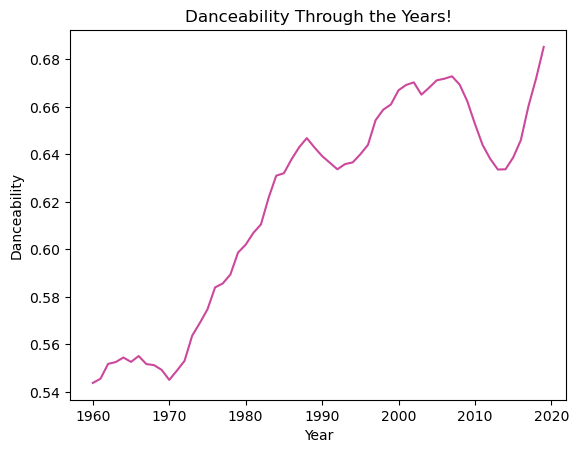

In [101]:
x = moving_features['Year']
plt.plot(x, moving_features['moving_dance'], color = '#cc489c')
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.title("Danceability Through the Years!")
plt.savefig('danceability.png')
plt.show()

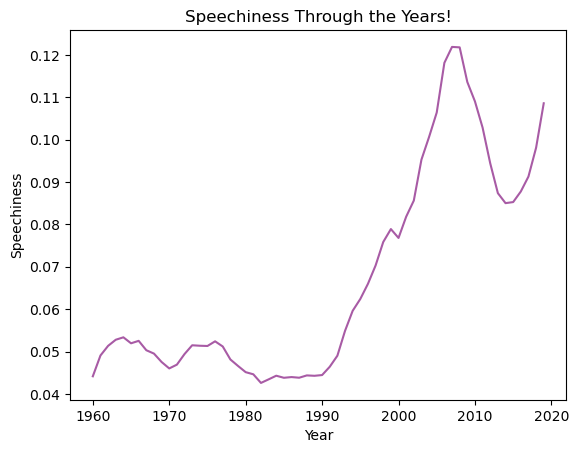

In [92]:
x = moving_features['Year']
plt.plot(x, moving_features['moving_speech'], color = '#a85ba5')
plt.xlabel("Year")
plt.ylabel("Speechiness")
plt.title("Speechiness Through the Years!")
plt.savefig('speechiness.png')
plt.show()

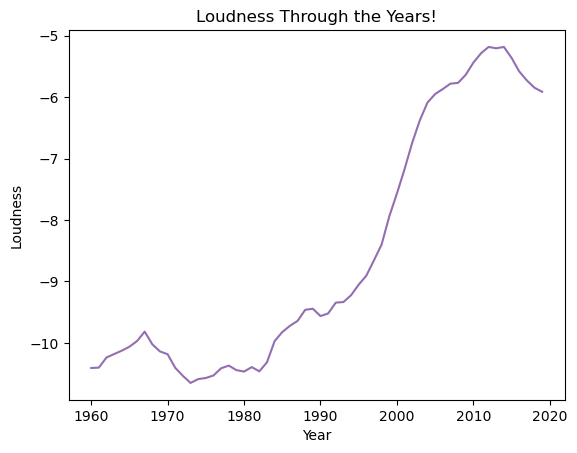

In [94]:
x = moving_features['Year']
plt.plot(x, moving_features['moving_loud'], color = '#936eb1')
plt.xlabel("Year")
plt.ylabel("Loudness")
plt.title("Loudness Through the Years!")
plt.savefig('loudness.png')
plt.show()

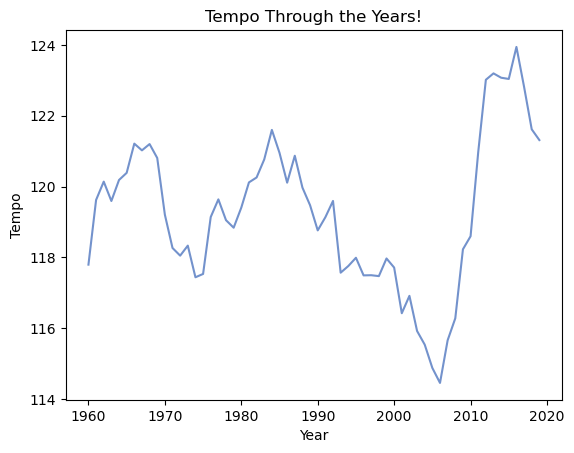

In [96]:
x = moving_features['Year']
plt.plot(x, moving_features['moving_tempo'], color = '#7392cc')
plt.xlabel("Year")
plt.ylabel("Tempo")
plt.title("Tempo Through the Years!")
plt.savefig('temp.png')
plt.show()

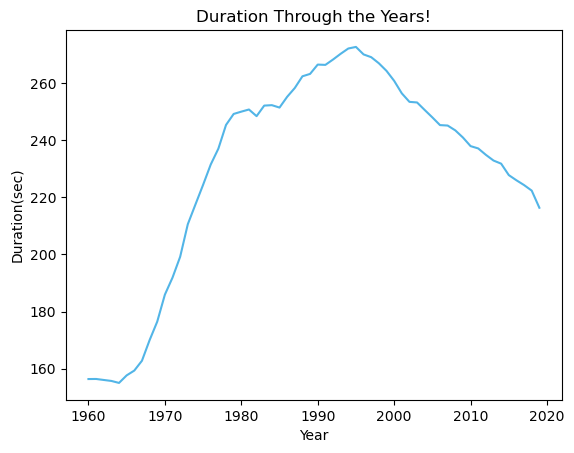

In [98]:
x = moving_features['Year']
plt.plot(x, moving_features['moving_duration'], color = '#52b5e7')
plt.xlabel("Year")
plt.ylabel("Duration(sec)")
plt.title("Duration Through the Years!")
plt.savefig('duration.png')
plt.show()